In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
%matplotlib inline

In [3]:
ds = xr.open_mfdataset("/home/satyam/Documents/Thesis_Work/Data1/precip.mon.mean.nc")
# It required as pandas dataframe
df = ds.to_dataframe().reset_index()
df = df[(df["time"] >= pd.to_datetime("1993-01-01")) & (df["time"] < pd.to_datetime("2002-12-31"))]
precip = df[(df["lon"] > 30) & (df["lon"] < 120) & (df["lat"] > 0) & (df["lat"] < 45)]
print(precip)

           lat     lon  nv       time  time_bnds  lat_bnds  lon_bnds    precip
5175384   1.25   31.25   0 1993-01-01 1993-01-01       0.0      30.0  1.921471
5175385   1.25   31.25   0 1993-02-01 1993-02-01       0.0      30.0  2.759369
5175386   1.25   31.25   0 1993-03-01 1993-03-01       0.0      30.0  3.329423
5175387   1.25   31.25   0 1993-04-01 1993-04-01       0.0      30.0  5.320088
5175388   1.25   31.25   0 1993-05-01 1993-05-01       0.0      30.0  6.852609
...        ...     ...  ..        ...        ...       ...       ...       ...
7649065  43.75  118.75   1 2002-08-01 2002-09-01      45.0     120.0  1.675602
7649066  43.75  118.75   1 2002-09-01 2002-10-01      45.0     120.0  0.333059
7649067  43.75  118.75   1 2002-10-01 2002-11-01      45.0     120.0  0.739434
7649068  43.75  118.75   1 2002-11-01 2002-12-01      45.0     120.0  0.067391
7649069  43.75  118.75   1 2002-12-01 2003-01-01      45.0     120.0  0.089280

[155520 rows x 8 columns]


In [4]:
precip.head()

,lat,lon,nv,time,time_bnds,lat_bnds,lon_bnds,precip
5175384,1.25,31.25,0,1993-01-01,1993-01-01,0.0,30.0,1.921471
5175385,1.25,31.25,0,1993-02-01,1993-02-01,0.0,30.0,2.759369
5175386,1.25,31.25,0,1993-03-01,1993-03-01,0.0,30.0,3.329423
5175387,1.25,31.25,0,1993-04-01,1993-04-01,0.0,30.0,5.320088
5175388,1.25,31.25,0,1993-05-01,1993-05-01,0.0,30.0,6.852609


In [5]:
# The precipitation value indicated by the variable 'precip' is our target variable
# and the remaining are the feature variables based on which we will predict the precipitation value.
precip1 = precip.iloc[:,0:7] 
precip1.head()     # We can see that the target value 'precip' is missing from the data

,lat,lon,nv,time,time_bnds,lat_bnds,lon_bnds
5175384,1.25,31.25,0,1993-01-01,1993-01-01,0.0,30.0
5175385,1.25,31.25,0,1993-02-01,1993-02-01,0.0,30.0
5175386,1.25,31.25,0,1993-03-01,1993-03-01,0.0,30.0
5175387,1.25,31.25,0,1993-04-01,1993-04-01,0.0,30.0
5175388,1.25,31.25,0,1993-05-01,1993-05-01,0.0,30.0


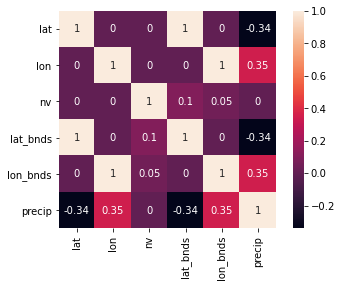

In [6]:
# we create a correlation matrix that measures the linear relationships between the variables.
# The correlation matrix can be formed by using the corr function from the pandas dataframe library.
# We will use theDecisionTree_precip_mon  heatmap function from the seaborn library to plot the correlation matrix.
correlation_matrix = precip.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cbar= True, square = True, annot=True)

# The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
# When it is close to -1, the variables have a strong negative correlation.

In [7]:
# Preparing the data for training the model
# We concatenate the lat and lon columns using np.c_ provided by the numpy library.

X = pd.DataFrame(np.c_[precip1['lat'], precip1['lon']], columns = ['lat','lon'])
Y = precip['precip']

In [9]:
# Splitting the data into training and testing sets
# We train the model with 70% of the samples and test with the remaining 30%.
# To split the data we use train_test_split function provided by scikit-learn library.
# We finally print the sizes of our training and test set to verify if the splitting has occurred properly.
from sklearn.model_selection import train_test_split   # To split the data into two parts

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(108864, 2)
(46656, 2)
(108864,)
(46656,)


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression   # To apply the logistic regression
from sklearn import metrics  # for to check the error and accuracy of the model
from sklearn.tree import DecisionTreeClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(precip[['lat', 'lon', 'precip']],precip.precip , test_size = 0.3)

In [18]:
# Discretisation is the process of transforming continuous variables into discrete variables
# by creating a set of contiguous intervals that span the range of variable values.

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.lat.to_frame(), X_train.precip)
X_train['lat']=tree_model.predict_proba(X_train.lat.to_frame())[:,1] 
X_train.head(10)

ValueError: Unknown label type: 'continuous'

In [12]:
# logistic = LogisticRegression()
# logistic.fit(X_train,Y_train)
# temp = logistic.predict(X_test)
# print(metrics.accuracy_score(temp,Y_test))

ValueError: Unknown label type: 'continuous'

In [13]:
clf = DecisionTreeClassifier(random_state = 0)
cross_val_score(clf,X_train,Y_train,cv=10)
clf.fit(X_train,Y_train,sample_weight=None,check_input=True,X_idx_sorted=None)
clf.get_params(deep=True)
clf.predict(X_test,check_input=True)
clf.predict_log_proba(X_test)
clf.predict(X_test,Y_test,sample_weight=None)

/home/satyam/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/satyam/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/satyam/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/satyam/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 181, in fit
    check_classification_targets(y)
  File "/home/satyam/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/

ValueError: Unknown label type: 'continuous'